In [4]:
from sklearn import linear_model
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls

Lab.ipynb           Lab5_Regression.pdf test


In [5]:
data = pd.read_table("test", sep = ' ', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,NaN,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,NaN,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,NaN,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,NaN,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,54.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,21.967222,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,16.362748,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,10.062300,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,13.146275,0.049442,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,15.431850,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,23.385425,0.819622,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,88.976200,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [35]:
import seaborn as sns

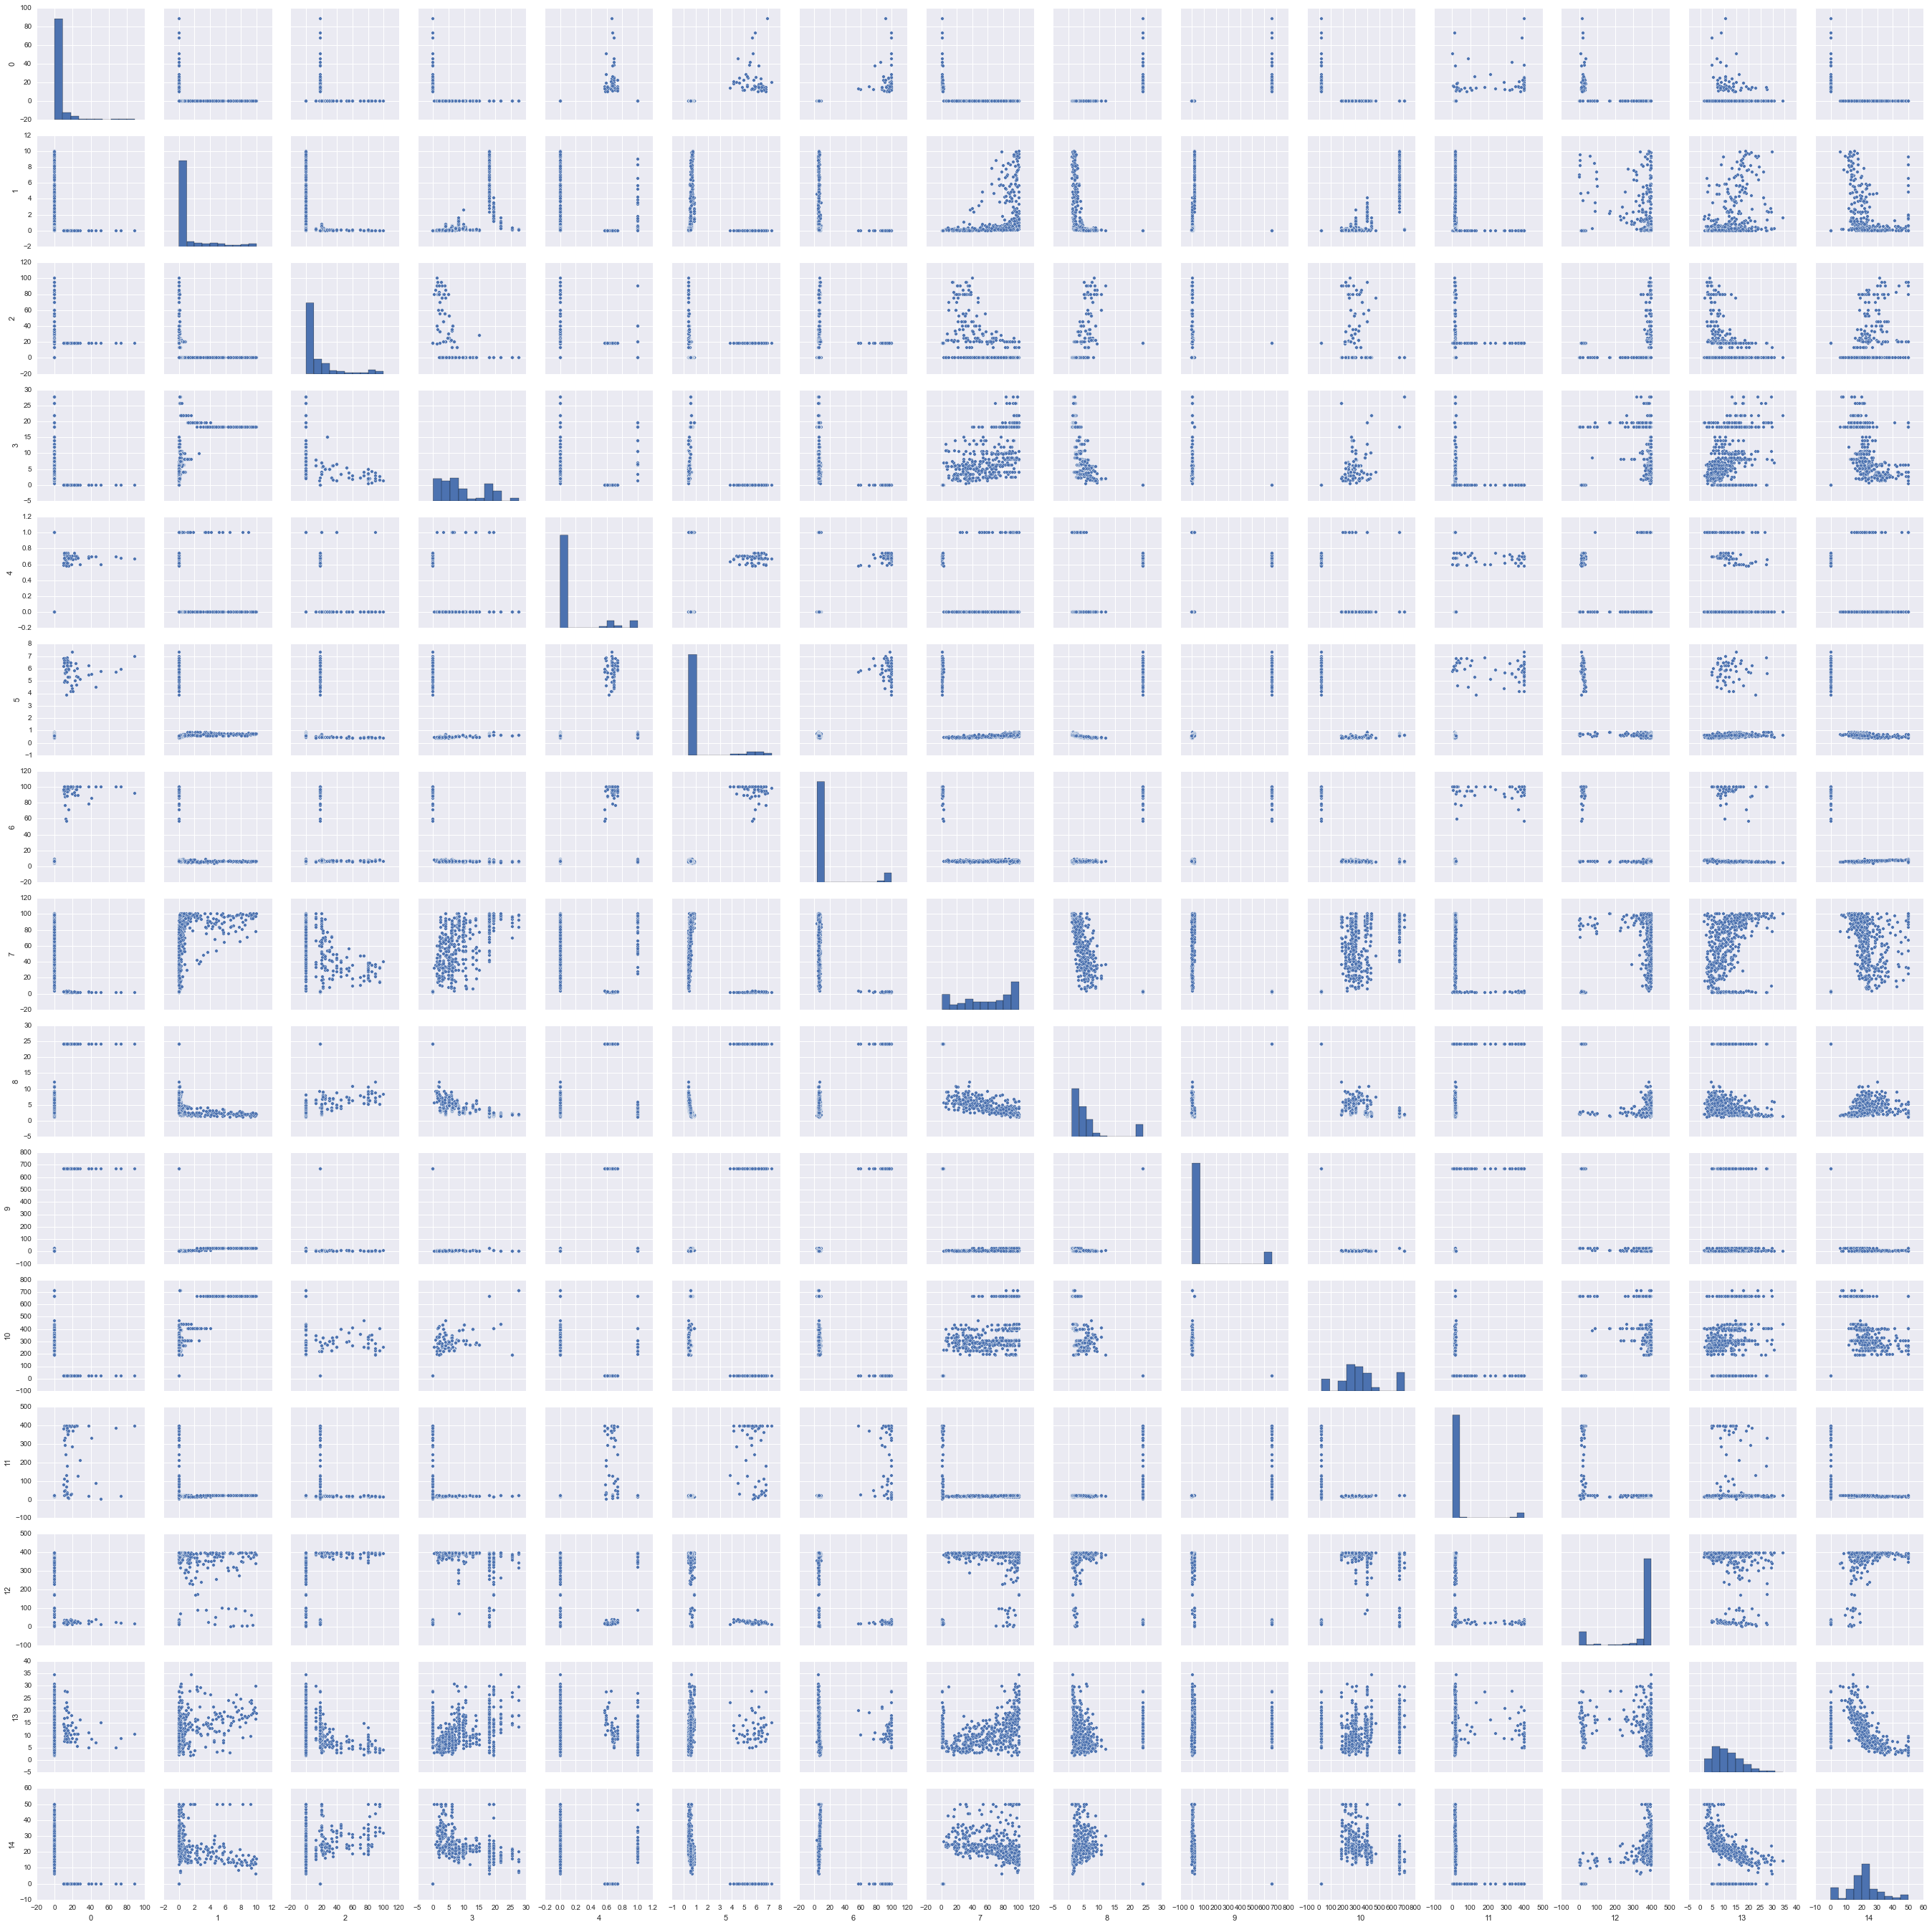

In [36]:
sns.pairplot(data)

# Split Train/Test --> strange way

In [23]:
X = data.ix[:,:14]
Y = data.ix[:,14]
p = 0.8
N = len(X.ix[:,1])
K = len(X.ix[1,:])
train_samples = np.random.binomial(1, p, N-1).astype(bool) # train_samples = np.random.randint(0,N-1,np.floor(N*p))
test_samples = ~train_samples # test_samples = np.setdif1d(range(N), train_samples)

In [25]:
X_train = X.ix[train_samples,:]
y_train = Y.ix[train_samples]
X_test = X.ix[test_samples,:]
y_test = Y.ix[test_samples]

# Split Train/Test --> right way

In [119]:
from sklearn.cross_validation import train_test_split

X = data.ix[:,:13]
y = data.ix[:,14]

# Data normalization

In [120]:
means, stds = np.mean(X, axis = 0), np.std(X, axis = 0)
X = (X - means)/stds

In [121]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.272437,-0.526893,0.204324,-0.962669,-0.450511,-0.342280,-0.334818,0.195195,-0.321993,-0.378985,-0.239999,-0.312176,0.512058,-1.082336
1,-0.272437,-0.518136,-0.577404,-0.298101,-0.450511,-0.384216,-0.340481,0.609451,-0.186430,-0.374068,-0.539182,-0.283604,0.512058,-0.395747
2,-0.272437,-0.518144,-0.577404,-0.298101,-0.450511,-0.384216,-0.312386,0.071220,-0.186430,-0.374068,-0.539182,-0.283604,0.479549,-1.239130
3,-0.272437,-0.516024,-0.577404,-0.980819,-0.450511,-0.390902,-0.319263,-0.391416,-0.017173,-0.369150,-0.649991,-0.273318,0.493927,-1.419029
4,-0.272437,-0.500721,-0.577404,-0.980819,-0.450511,-0.390902,-0.313783,-0.137420,-0.017173,-0.369150,-0.649991,-0.273318,0.512058,-1.024570


# Replace NaN with 0 and split data on train, test

In [122]:
X.fillna(0, inplace=True)

In [123]:
X_train, X_test, y_train, y_test = np.array(train_test_split(X, y, test_size=0.33, random_state=42))

In [124]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
478,0.916752,-0.529530,0.208667,-1.285180,1.514566,3.089790,2.979418,-1.710671,2.755271,2.891384,-1.768049,3.852460,-2.514095,0.505401
26,-0.272437,-0.249198,-0.577404,-0.148712,-0.450511,-0.342280,-0.362839,0.954160,-0.230495,-0.364232,-0.179054,-0.247032,0.352152,0.540061
7,-0.272437,-0.469221,-0.034537,-0.186408,-0.450511,-0.350789,-0.349638,1.129539,-0.034437,-0.359314,-0.156893,-0.313319,0.512058,1.256358
492,-0.272437,-0.483085,-0.577404,2.587747,-0.450511,-0.299129,-0.356588,0.748544,-0.628035,-0.364232,2.059279,-0.257318,0.512058,0.299094
108,-0.272437,-0.476118,-0.577404,-0.090074,-0.450511,-0.353220,-0.338532,1.159776,-0.578113,-0.359314,0.247559,-0.248175,0.498799,0.120845


# Applying linear regression

In [125]:
lmr = linear_model.LinearRegression(copy_X=False)
lmr.fit(X_train, y_train)
lmr.coef_

array([ -0.38674148,   0.53150379,   1.89342925,  -1.02081935,
         1.34166601,  -1.77095202,   2.23221071,  -0.27013062,
       -10.53903988,   1.40887258,  -1.59618478,  -0.06183289,
         1.17290993,  -5.21799922])

# MSE score for test and for train

In [126]:
from sklearn.metrics import mean_squared_error
y_pred_train = lmr.predict(X_train)
y_pred_test = lmr.predict(X_test)

In [127]:
mean_squared_error(y_pred_train, y_train)

30.878127766373151

In [128]:
mean_squared_error(y_pred_test, y_test)

26.769386772019388

In [129]:
X_train.shape

(339, 14)

In [130]:
X_test.shape

(167, 14)

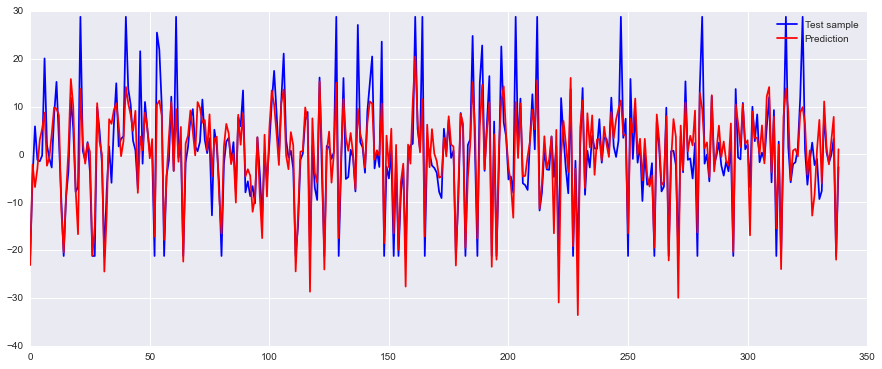

In [131]:
plt.figure(figsize=(15,6))
plt.plot(y_train,'b', label='Test sample')
plt.plot(lmr.predict(X_train),'r', label='Prediction')
plt.legend()

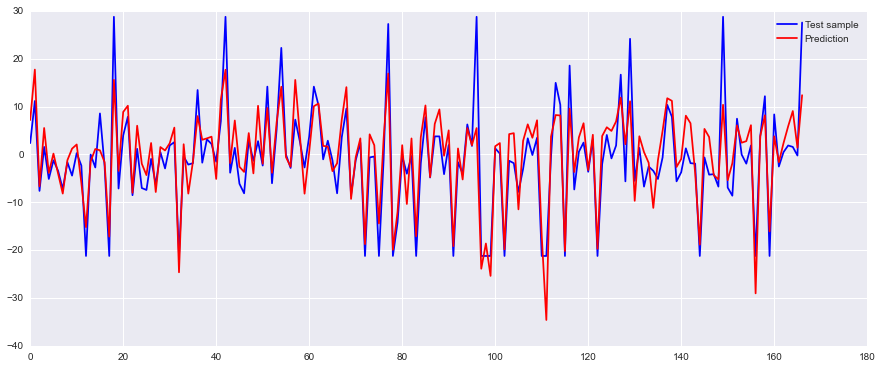

In [132]:
# 5 Added to predict data for visualisation of identity: for getting rid of overlap.

plt.figure(figsize=(15,6))
plt.plot(y_test,'b', label='Test sample')
plt.plot(lmr.predict(X_test),'r', label='Prediction')
plt.legend()

# Число обусловленности матрицы

In [133]:
v,_=np.linalg.eig(np.dot(X_train.T,X_train))
print min(v), max(v), np.linalg.cond(np.dot(X_train.T,X_train))

1.53394351511 2494.42766812 1626.15353404


Довольно большое число обусловленности.

# Ridge

In [134]:
from sklearn.linear_model import Ridge

In [135]:
alphas = np.linspace(0.001, 1, 20)

In [136]:
test_error = []
train_error = []
for a in alphas:
    ridge_model = Ridge(copy_X=False, alpha = a)
    ridge_model.fit(X_train, y_train)
    y_pred_test = ridge_model.predict(X_test)
    y_pred_train = ridge_model.predict(X_train)
    test_error.append(mean_squared_error(y_pred_test, y_test))
    train_error.append(mean_squared_error(y_pred_train, y_train))

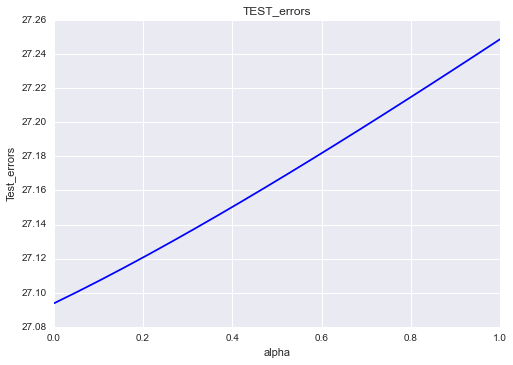

In [137]:
plt.plot(alphas, test_error, "b")
plt.xlabel('alpha')
plt.ylabel('Test_errors')
plt.title("TEST_errors")
plt.show()

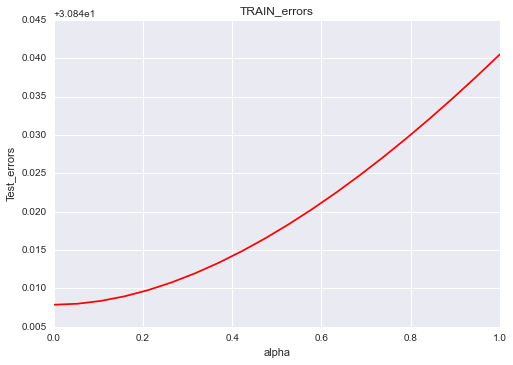

In [138]:
plt.plot(alphas, train_error, "r")
plt.xlabel('alpha')
plt.ylabel('Test_errors')
plt.title("TRAIN_errors")
plt.show()

# Lasso

In [139]:
from sklearn.linear_model import Lasso

In [140]:
test_error = []
train_error = []
for a in alphas:
    lasso_model = Lasso(copy_X=False, alpha = a)
    lasso_model.fit(X_train, y_train)
    y_pred_test = lasso_model.predict(X_test)
    y_pred_train = lasso_model.predict(X_train)
    test_error.append(mean_squared_error(y_pred_test, y_test))
    train_error.append(mean_squared_error(y_pred_train, y_train))

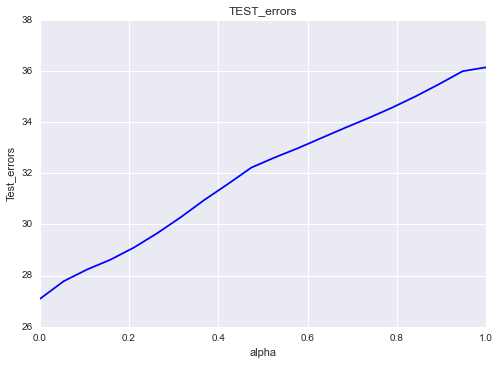

In [141]:
plt.plot(alphas, test_error, "b")
plt.xlabel('alpha')
plt.ylabel('Test_errors')
plt.title("TEST_errors")
plt.show()

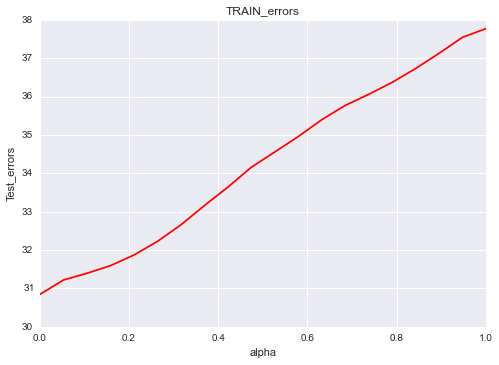

In [142]:
plt.plot(alphas, train_error, "r")
plt.xlabel('alpha')
plt.ylabel('Test_errors')
plt.title("TRAIN_errors")
plt.show()

# Информационный критерий

In [143]:
# AIC критерий для регрессии
N = X.shape[0]
K = X.shape[1]
SSE = np.sum((lmr.predict(X_train)-y_train)**2)
n = len(y_train)
# aic_regr=2*K+N*ln(SSE/(N-2))
aic_regr = 2*K+n*np.log(SSE/(n-2))
aic_regr

1192.7922268755553

In [144]:
# BIC критерий для регрессии bic_regr = N*ln(SSE/N)+K*ln(N)
bic_regr = n*np.log(SSE/n)+K*np.log(n)
bic_regr

1244.3503053663599